## Finding number of clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

Data loading

In [2]:
df = pd.read_csv("data/data_norm_hot_pca.csv")
df.set_index('id', inplace=True)

df.head(15)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6
id,,,,,,
0,0.118034,-0.034704,0.386329,0.690975,-0.370667,-0.190191
1,0.088552,-0.052725,0.311631,0.739474,-0.270794,0.088899
2,-0.062090,-0.617809,0.010082,-0.466995,-0.457398,0.160894
3,-0.105477,-0.307870,-0.492032,0.152574,0.684416,-0.123650
4,0.039040,0.050978,0.386481,0.065974,0.084352,0.016833
5,-0.653155,0.607744,-0.004337,-0.052001,-0.276976,0.008487
6,-0.019616,-0.209253,-0.669199,0.843141,-0.460133,-0.074752
7,0.050533,-0.014904,0.337410,0.687954,-0.389994,0.127070
8,0.049412,0.111932,0.369934,0.179731,-0.061945,0.047972


  0%|          | 0/18 [00:00<?, ?it/s]

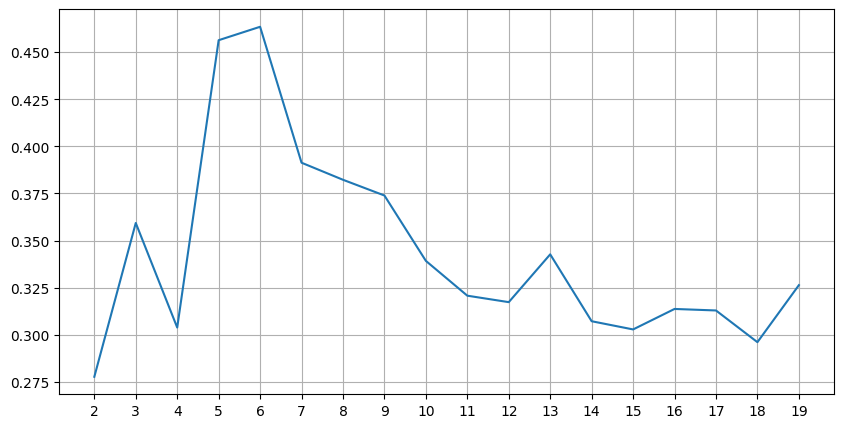

In [12]:
k_range = range(2,20)

scores = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, n_init=2)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels, metric='euclidean')
    scores.append((k, score))

ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.plot(ax_x, ax_y)

  0%|          | 0/18 [00:00<?, ?it/s]

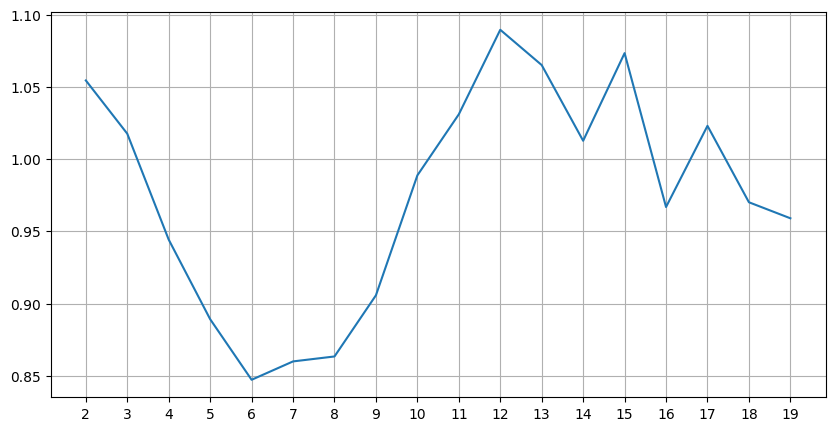

In [13]:
from sklearn.metrics import davies_bouldin_score
from tqdm.notebook import tqdm

k_range = range(2,20)

scores = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(df)
    score = davies_bouldin_score(df, labels)
    scores.append((k, score))

ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.plot(ax_x, ax_y)

We found that best K is 6